In [1]:
# Depth vs Time transition for U, T in Stratification Runs
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import gsw

In [2]:
def UT_prof(datapath, case_id, xidx):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    # Along-fjord velocity
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    #Uzt = u_ymean[:,:,xidx] # U in z, t dimensions
    Uzt = u0[:,:,:,xidx].mean(2).T
    
    # Potential temp
    Tzt = state.Temp.data[:,:,:,xidx].mean(2).T # Temp in z, t dimensions
    
    depth = state.Z.data
    time = state.T.data / 86400 # Time in days
    
    # Pressure and Density
    pres = gsw.p_from_z(depth, 55)
    Szt = state.S.data[:,:,:,xidx].mean(2).T
    p = np.tile(pres,[len(time),1]).T
    Rho = gsw.rho(Szt, Tzt, p)
    return depth, time, Uzt, Tzt, Rho

In [5]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
path3 = '/work/oceans/wbao/MITgcm_results/iceplume/6_Tide_minhs'

caseN = 4
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

depth, time, U1, T1, Rho1 = UT_prof(path2, caseN, gf)
depth, time, U2, T2, Rho2 = UT_prof(path2, caseN, sw)
depth, time, U3, T3, Rho3 = UT_prof(path2, caseN, sc)
depth, time, U4, T4, Rho4 = UT_prof(path2, caseN, se)

In [7]:
#depth
#np.max(Rho3-1000), np.min(Rho3-1000), np.mean(Rho3-1000)
U1.max(), U2.max(), U3.max(), U4.max()

(0.25273043, 0.18753888, 0.18052253, 0.19124052)

Text(0.5, 0, 'Time [days]')

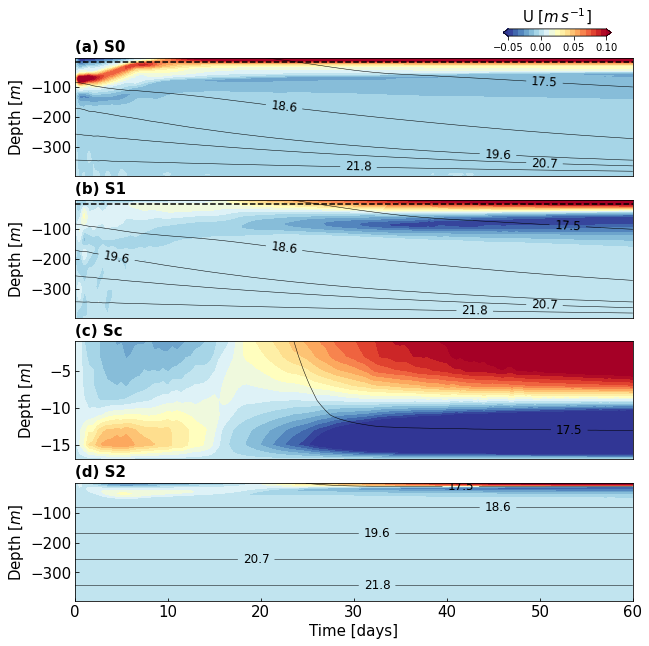

In [6]:
# Making plot for along-fjord velocity U
fig1 = plt.figure(figsize=(10,10))
fig1.tight_layout()  

cu = np.linspace(-0.05,0.1,20) # Contour range for U
crho = np.linspace(10,25,15) # Contour range for density
cmap = 'RdYlBu_r'


ax1 = fig1.add_subplot(411)
im1 = ax1.contourf(time, depth, U1, cu, cmap=cmap, extend='both')
ax1.axhline(y=depth[8],color='k',linestyle='--')

# Plot isopycnals
CS1 = ax1.contour(time, depth, Rho1-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

cbaxes = fig1.add_axes([0.72, 0.91, 0.15, 0.01])
cbar = fig1.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([-0.05,0,0.05,0.1])
cbar.ax.set_title('U [$m\,s^{-1}$]', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(depth[-1],depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig1.add_subplot(412)
im2 = ax2.contourf(time, depth, U2, cu, cmap=cmap, extend='both')
ax2.axhline(y=depth[8],color='k',linestyle='--')
CS2 = ax2.contour(time, depth, Rho2-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)


ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(depth[-1],depth[0])
ax2.xaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)



ax3 = fig1.add_subplot(413)
im3 = ax3.contourf(time, depth, U3, cu, cmap=cmap, extend='both')
#ax3.axhline(y=-16,color='k',linestyle='--')
CS3 = ax3.contour(time, depth[:8], Rho3[:8,:]-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)


ax3.set_xlim(time[0],time[-1])
ax3.set_ylim(depth[8],depth[0])
ax3.xaxis.set_visible(False)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
ax3.set_ylabel('Depth [$m$]', size=15)



ax4 = fig1.add_subplot(414)
im4 = ax4.contourf(time, depth, U4, cu, cmap=cmap, extend='both')
CS4 = ax4.contour(time, depth[:-1], Rho4[:-1,:]-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

ax4.set_xlim(time[0],time[-1])
ax4.set_ylim(depth[-1],depth[0])
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
ax4.set_ylabel('Depth [$m$]', size=15)
ax4.set_xlabel('Time [days]', size=15)

Text(0.5, 0, 'Time [days]')

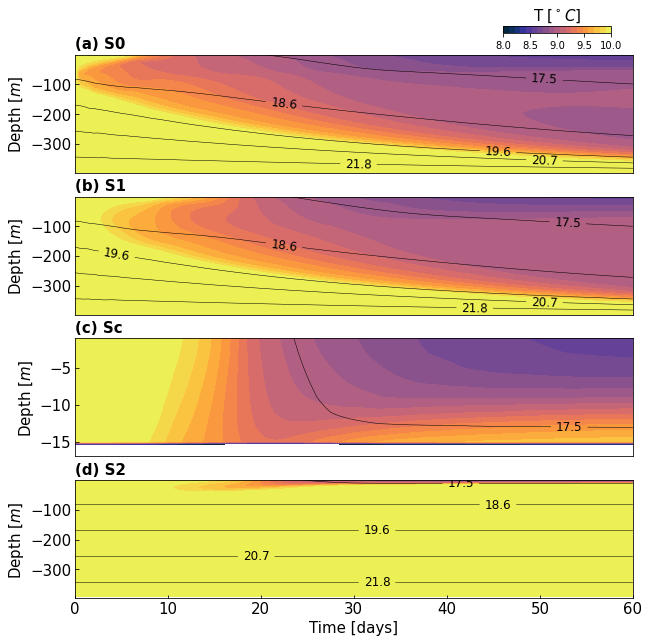

In [7]:
# Making plot for potential temperature
fig2 = plt.figure(figsize=(10,10))
fig2.tight_layout()  

ct = np.linspace(8,10,20) # Contour range for T
crho1 = np.linspace(10,25,15) # Contour range for density
crho2 = np.linspace(16,20,15) 


#cmap2 = 'YlGnBu_r'
import cmocean
cmap2 = cmocean.cm.thermal

ax1 = fig2.add_subplot(411)
im1 = ax1.contourf(time, depth, T1, ct, cmap=cmap2)
# Plot isopycnals
CS1 = ax1.contour(time, depth, Rho1-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

cbaxes = fig2.add_axes([0.72, 0.91, 0.15, 0.01])
cbar = fig2.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([8,8.5,9,9.5,10])
cbar.ax.set_title('T [$^\circ C$]', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(depth[-1],depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title('(a) S0', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig2.add_subplot(412)
im2 = ax2.contourf(time, depth, T2, ct, cmap=cmap2)
CS2 = ax2.contour(time, depth, Rho2-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(depth[-1],depth[0])
ax2.xaxis.set_visible(False)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)



ax3 = fig2.add_subplot(413)
im3 = ax3.contourf(time, depth, T3, ct, cmap=cmap2)
#ax3.axhline(y=-16,color='k',linestyle='--')
CS3 = ax3.contour(time, depth[:8], Rho3[:8,:]-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

ax3.set_xlim(time[0],time[-1])
ax3.set_ylim(depth[8],depth[0])
ax3.xaxis.set_visible(False)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
ax3.set_ylabel('Depth [$m$]', size=15)



ax4 = fig2.add_subplot(414)
im4 = ax4.contourf(time, depth, T4, ct, cmap=cmap2)
CS4 = ax4.contour(time, depth[:-1], Rho4[:-1,:]-1000, crho1, colors='k', linewidths=.5)
plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

ax4.set_xlim(time[0],time[-1])
ax4.set_ylim(depth[-1],depth[0])
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title('(d) S2', loc='left', size=15, weight='bold')
ax4.set_ylabel('Depth [$m$]', size=15)
ax4.set_xlabel('Time [days]', size=15)

In [6]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig1.savefig(fig_path + '/4LiSz-minhs_Utime.png', dpi=300, bbox_inches='tight')
fig2.savefig(fig_path + '/4LiSz-minhs_Ttime.png', dpi=300, bbox_inches='tight') 

In [33]:
U= xr.open_dataset(path2 + '/state_' + str(format(4,'03d')) + '.nc').U.data
Usill = U[:,:,:,se]

In [38]:
Usill[-1,8,35:45]

array([ 0.02451001,  0.00676939, -0.0153006 , -0.03456059, -0.05152575,
       -0.0654933 , -0.0776168 , -0.08133217, -0.07663617, -0.07449002],
      dtype=float32)